## Create the mixing matrices and Pienter reduction of mixing matrices
This notebook converts the raw mixing data (from [1]) to usable mixing matrices in our COVID 19 model. The 16 demographies from the raw tables are mapped to the 11 demographies as used in our model.

[1] https://github.com/InstituteforDiseaseModeling/synthpops/tree/master/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def translate_polymod(g):
    if g == 0:
        return [0], [1]
    if g == 1:
        return [1, 2], [1, 0.5]
    if g == 2:
        return [2, 3], [0.5, 1]
    if g == 3 or g == 4:
        return [4, 5], [1, 0.5]
    if g == 5 or g == 6:
        return [5, 6, 7, 8, 9, 10], [0.5, 1, 1, 1, 1, 1]
    if g == 7 or g == 8:
        return [11, 12, 13], [1, 1, 0.5]
    if g == 9:
        return [13, 14, 15], [0.5, 1, 1]
    if g == 10:
        return [15], [1]

In [3]:
def new_mixmat(matraw):
    mat = np.zeros(shape=(11, 11))
    for i in range(11):
        row, ps = translate_polymod(i)
        ps = np.array(ps)
        matrow = (matraw[row].T*ps)/len(ps)
        for j in range(11):
            col, ps = translate_polymod(j)
            ps = np.array(ps)
            mat[i, j] = np.sum(matrow[col].T*ps)
    return mat

In [4]:
Mix_h_r = pd.read_excel('~/cbs-covid/src/data/MUestimates_home_2.xlsx',sheet_name='Netherlands', header=None)
Mix_s_r = pd.read_excel('~/cbs-covid/src/data/MUestimates_school_2.xlsx',sheet_name='Netherlands', header=None)
Mix_w_r = pd.read_excel('~/cbs-covid/src/data/MUestimates_work_2.xlsx',sheet_name='Netherlands', header=None)
Mix_o_r = pd.read_excel('~/cbs-covid/src/data/MUestimates_other_locations_2.xlsx',sheet_name='Netherlands', header=None)
Mix_h = new_mixmat(np.array(Mix_h_r))
Mix_s = new_mixmat(np.array(Mix_s_r))
Mix_w = new_mixmat(np.array(Mix_w_r))
Mix_o = new_mixmat(np.array(Mix_o_r))  
Mix_ws = (Mix_s+Mix_w)/2

/usr/local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


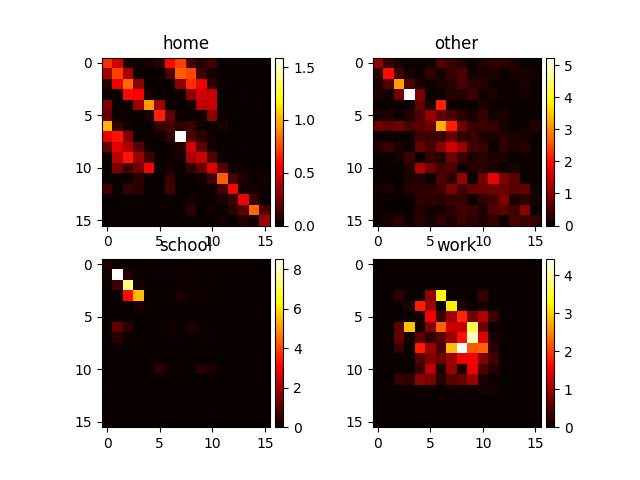

In [5]:
%matplotlib widget
fig, axs = plt.subplots(2, 2)
all_matrices = [Mix_h_r, Mix_o_r, Mix_s_r, Mix_w_r]
all_matrices_name = ["home", "other", "school", "work"]

i = 0
for ax in axs.flat:
    im = ax.imshow(all_matrices[i], cmap='hot', interpolation='nearest')
    ax.set_title(all_matrices_name[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    i += 1
plt.show()

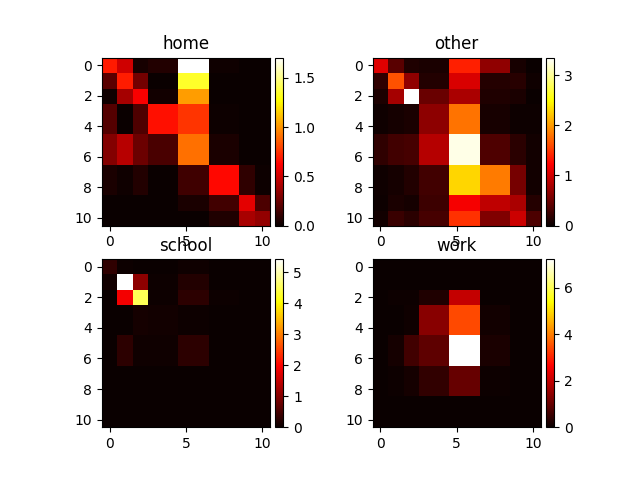

In [7]:
%matplotlib widget
fig, axs = plt.subplots(2, 2)
all_matrices = [Mix_h, Mix_o, Mix_s, Mix_w]
all_matrices_name = ["home", "other", "school", "work"]

i = 0
for ax in axs.flat:
    im = ax.imshow(all_matrices[i], cmap='hot', interpolation='nearest')
    ax.set_title(all_matrices_name[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    i += 1
plt.show()
plt.savefig('/tmp/interaction_matrices.svg', format='svg')

In [18]:
np.savetxt("/Users/ahmadh/cbs-covid/src/data/Mix_h.csv", Mix_h, delimiter=",")
np.savetxt("/Users/ahmadh/cbs-covid/src/data/Mix_s.csv", Mix_s, delimiter=",")
np.savetxt("/Users/ahmadh/cbs-covid/src/data/Mix_w.csv", Mix_w, delimiter=",")
np.savetxt("/Users/ahmadh/cbs-covid/src/data/Mix_o.csv", Mix_o, delimiter=",")
np.savetxt("/Users/ahmadh/cbs-covid/src/data/Mix_ws.csv", Mix_ws, delimiter=",")

In [15]:
len(Mix_h)

11

In [8]:
# Raw data obtained from supplementary matrials of: https://www.eurosurveillance.org/content/10.2807/1560-7917.ES.2021.26.8.2000994 
pienter_ref_r = pd.read_csv('~/cbs-covid/src/data/pienter_ref.csv', header=None).T
pienter_april_r = pd.read_csv('~/cbs-covid/src/data/pienter_april.csv', header=None).T
pienter_june_r = pd.read_csv('~/cbs-covid/src/data/pienter_june.csv', header=None).T

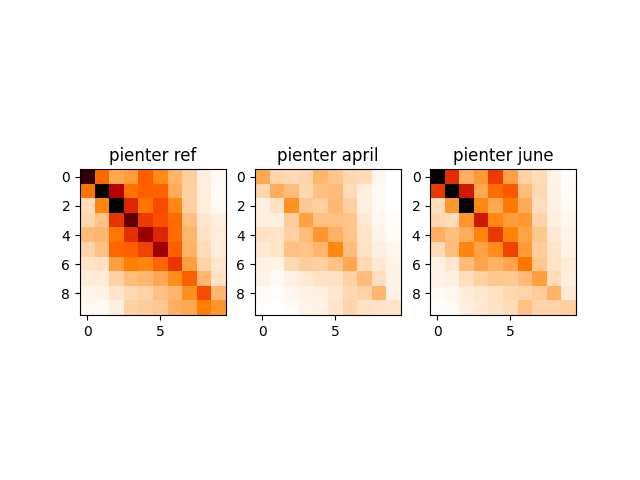

In [81]:
%matplotlib widget
fig, axs = plt.subplots(1,3)
all_matrices = [pienter_ref_r, pienter_april_r, pienter_june_r]
all_matrices_name = ["pienter ref", "pienter april", "pienter june"]

i = 0
for ax in axs.flat:
    im = ax.imshow(all_matrices[i], cmap='gist_heat_r', interpolation='nearest', vmin=0, vmax=7)
    ax.set_title(all_matrices_name[i])
    i += 1

# fig.subplots_adjust(right=0.95)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)
plt.show()

In [9]:
pienter_diff_ref = (pienter_ref_r - pienter_ref_r) / pienter_ref_r
pienter_diff_april = (pienter_ref_r - pienter_april_r) / pienter_ref_r
pienter_diff_june = (pienter_ref_r - pienter_june_r) / pienter_ref_r

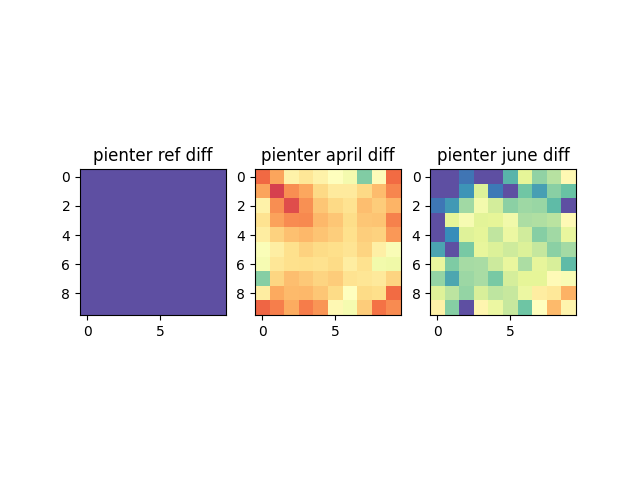

In [10]:
%matplotlib widget
fig, axs = plt.subplots(1,3)
all_matrices = [pienter_diff_ref, pienter_diff_april, pienter_diff_june]
all_matrices_name = ["pienter ref diff", "pienter april diff", "pienter june diff"]

i = 0
for ax in axs.flat:
    im = ax.imshow(all_matrices[i], cmap='Spectral_r', interpolation='nearest', vmin=0, vmax=1)
    ax.set_title(all_matrices_name[i])
    i += 1

# fig.subplots_adjust(right=0.95)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)
plt.show()

In [11]:
def rivm_to_model(mat):
    newvec = np.zeros(shape=(11, 11))
    for k in range(11):
        for l in range(11):
            newvec[k, l] = np.mean(mat[iconv(k)][:, iconv(l)])
    return newvec

def iconv(i):
    if i == 0:
        j = [0]
    if i == 1:
        j = [1]
    if i == 2:
        j = [2]
    if i == 3 or i == 4:
        j = [3]
    if i == 5 or i == 6:
        j = [4, 5, 6]
    if i == 7 or i == 8:
        j = [6, 7]
    if i == 9:
        j = [7, 8]
    if i == 10:
        j = [9]
    return j

In [12]:
pienter_ref = rivm_to_model(pienter_ref_r.to_numpy())
pienter_april = rivm_to_model(pienter_april_r.to_numpy())
pienter_june = rivm_to_model(pienter_june_r.to_numpy())

In [13]:
mixmat_phase2 = pienter_april / pienter_ref
mixmat_phase4 = pienter_june / pienter_ref

In [100]:
mixmat_phase2

array([[0.19155642, 0.28622066, 0.45924393, 0.4241235 , 0.4241235 ,
        0.49035422, 0.49035422, 0.62730126, 0.62730126, 0.68908371,
        0.19655953],
       [0.28782113, 0.10716331, 0.2535014 , 0.29283384, 0.29283384,
        0.41666077, 0.41666077, 0.41962817, 0.41962817, 0.37032287,
        0.23993867],
       [0.45763571, 0.25121658, 0.13580739, 0.2552042 , 0.2552042 ,
        0.38304187, 0.38304187, 0.38993989, 0.38993989, 0.34316874,
        0.31371333],
       [0.41239815, 0.28316014, 0.24902116, 0.24365735, 0.24365735,
        0.35396887, 0.35396887, 0.38287449, 0.38287449, 0.34811124,
        0.23066169],
       [0.41239815, 0.28316014, 0.24902116, 0.24365735, 0.24365735,
        0.35396887, 0.35396887, 0.38287449, 0.38287449, 0.34811124,
        0.23066169],
       [0.48310537, 0.41053009, 0.38152785, 0.3588703 , 0.3588703 ,
        0.39233846, 0.39233846, 0.410359  , 0.410359  , 0.41080902,
        0.45610004],
       [0.48310537, 0.41053009, 0.38152785, 0.3588703 , 0.

In [15]:
mixmat_phase4

array([[1.55316351, 1.4101229 , 0.93204717, 1.03385298, 1.03385298,
        0.95225498, 0.95225498, 0.65274867, 0.65274867, 0.72218932,
        0.47930195],
       [1.41794873, 1.478258  , 0.87656393, 0.61561837, 0.61561837,
        0.94554348, 0.94554348, 0.80934152, 0.80934152, 0.82600695,
        0.79487168],
       [0.92877263, 0.86867113, 0.71152429, 0.54452495, 0.54452495,
        0.70066464, 0.70066464, 0.71937598, 0.71937598, 0.75035956,
        1.046339  ],
       [1.00530381, 0.59529045, 0.53133404, 0.6033358 , 0.6033358 ,
        0.61097137, 0.61097137, 0.69488014, 0.69488014, 0.68339745,
        0.48114601],
       [1.00530381, 0.59529045, 0.53133404, 0.6033358 , 0.6033358 ,
        0.61097137, 0.61097137, 0.69488014, 0.69488014, 0.68339745,
        0.48114601],
       [0.95813899, 0.93721629, 0.6986232 , 0.62026619, 0.62026619,
        0.63164762, 0.63164762, 0.65500695, 0.65500695, 0.6691694 ,
        0.71023641],
       [0.95813899, 0.93721629, 0.6986232 , 0.62026619, 0.

In [14]:
np.savetxt("/Users/ahmadh/cbs-covid/src/data/mixmat_phase2.csv", mixmat_phase2, delimiter=",")
np.savetxt("/Users/ahmadh/cbs-covid/src/data/mixmat_phase4.csv", mixmat_phase4, delimiter=",")